# MD004 ENTREGA7 ENTROPÍA


Se dispone del siguiente dataset que contiene características de dos tipos de calabazas. El objetivo será elaborar un modelo de regresión logística que nos permita realizar una predicción sobre si la calabaza es del tipo Urgup_Sivrisi (0) o del tipo Cercevelik (1)

- Area: área de la calabaza
- Perimeter: perímetro de la calabaza
- Major_Axis_Length: Longitud del eje más largo de la calabaza
- Minor_Axis_Length: Longitud del eje más corto de la calabaza
- Convex_Area: Área convexa de la calabaza
- Equiv_Diameter: Diámetro equivalente
- Eccentricity: Excentricidad de la calabaza
- Solidity: Solidez de la calabaza
- Extent: Alcance de la calabaza
- Roundness: Redondez de la calabaza
- Aspect_Ration: Relación de aspecto de la calabaza
- Compactness: Compactibilidad de la calabaza
- Class: Clase de la calabaza


###### Data: 
20240123_Semillas_calabaza.csv'

###### Se pide:


## 1. Visualización, limpieza y comprensión del dataset

## <font color='#3d59c6'>  1.1 CARGA DE PACKAGES </font>

In [84]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(gridExtra)
library(infotheo)

library(corrplot)
library(nortest)
library(broom)
library(lmtest)

## <font color='#3d59c6'>  1.2 CARGA DE DATOS </font>

In [85]:
data_cb = read.csv(file='20240123_Semillas_calabaza.csv', header=TRUE, sep=',', dec='.')
head(data_cb)
tail(data_cb)

X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik


,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2495,2495,79755,1146.431,470.3888,217.8296,80649,318.6647,0.8863,0.9889,0.7175,0.7626,2.1594,0.6774,Ürgüp Sivrisi
2496,2496,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2497,2497,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2498,2498,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2499,2499,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
2500,2500,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


De nuevo, al usar la función **head()** y **tail()** obtenemos un primer vistazo a nustros datos. En este caso, contamos con 2500 registros, descritos con 12 variables numéricas y una variable categórica (nuestra variable objetivo)

## <font color='#3d59c6'>  1.3. VISUALIZACIÓN Y COMPRENSIÓN DEL DATASET </font>

In [86]:
data_cb = data_cb[,-1]
str(data_cb)
dim(data_cb)

is.null(data_cb)

any(duplicated(data_cb))

'data.frame':	2500 obs. of  13 variables:
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : Factor w/ 2 levels "Çerçevelik","Ürgüp Sivrisi": 1 1 1 1 1 1 1 1 1 1 ...


[1] 2500   13

[1] FALSE

[1] FALSE

No tenemos presencia ni de nulos ni duplicados. También vemos como las variables relacionadas con el Área son de tipo int, dandonos a entender que se requiere de un tipo de dato más grande que num para guardar dichos datos. Nuestra variable categórica cuenta con 2 clases (Çerçevelik y Ürgüp Sivrisi)

### <font color='#3d59c6'>  1.3.1 Variables numéricas </font>

In [87]:
data_cb_numericas = data_cb %>%
  select_if(is.numeric)

summary(data_cb_numericas)

      Area          Perimeter      Major_Axis_Length Minor_Axis_Length
 Min.   : 47939   Min.   : 868.5   Min.   :320.8     Min.   :152.2    
 1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0     1st Qu.:211.2    
 Median : 79076   Median :1123.7   Median :449.5     Median :224.7    
 Mean   : 80658   Mean   :1130.3   Mean   :456.6     Mean   :225.8    
 3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7     3rd Qu.:240.7    
 Max.   :136574   Max.   :1559.5   Max.   :661.9     Max.   :305.8    
  Convex_Area     Equiv_Diameter   Eccentricity       Solidity     
 Min.   : 48366   Min.   :247.1   Min.   :0.4921   Min.   :0.9186  
 1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317   1st Qu.:0.9883  
 Median : 79872   Median :317.3   Median :0.8637   Median :0.9903  
 Mean   : 81508   Mean   :319.3   Mean   :0.8609   Mean   :0.9895  
 3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970   3rd Qu.:0.9915  
 Max.   :138384   Max.   :417.0   Max.   :0.9481   Max.   :0.9944  
     Extent         Roundne

Observando primero las variables numéricas, podemos ver como hay algunas variables que pueden mostrar outliers. Para indagar mas a fondo, vamos a observar los histogramas y boxplots de dichas variables



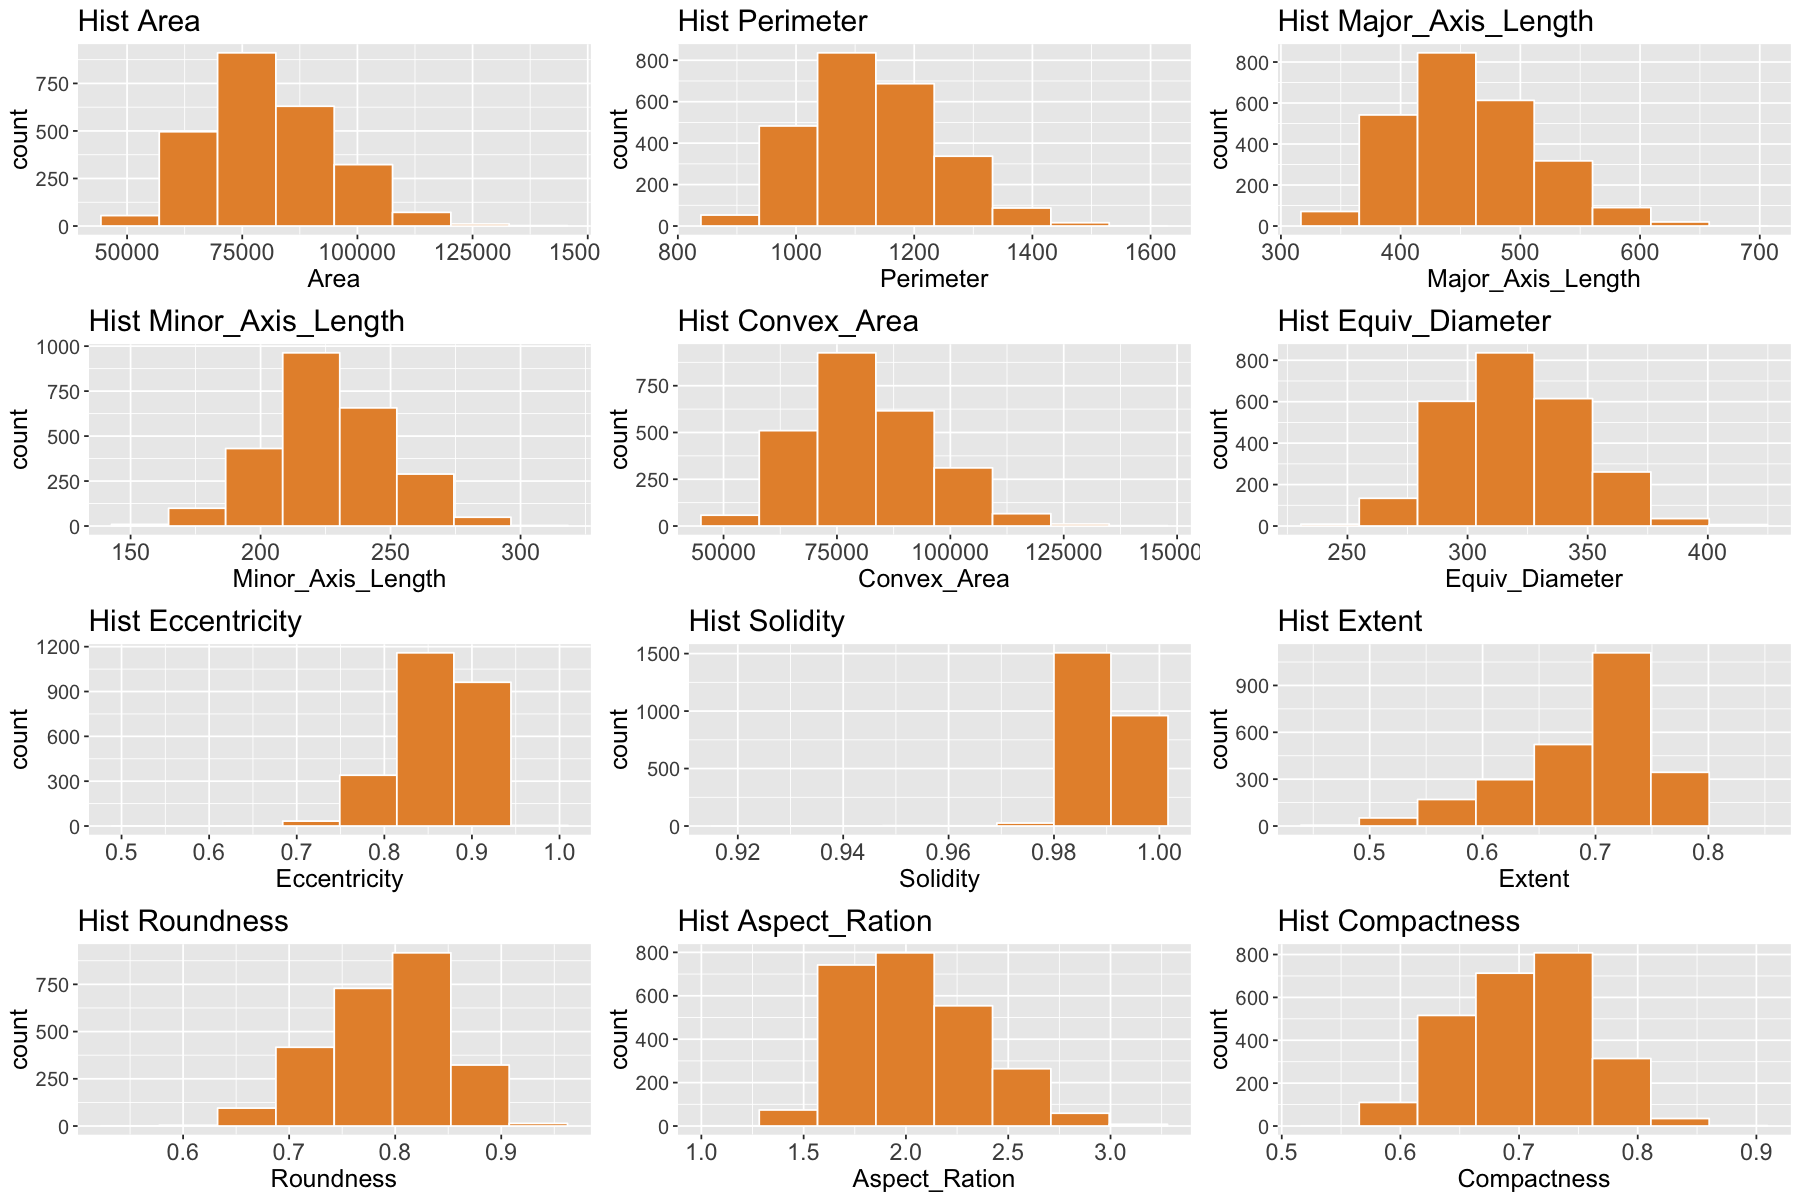

In [88]:
graficos_histograma = list()
var_data = colnames(data_cb_numericas)

for (variable in var_data) {

  grafico = ggplot(data_cb_numericas) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

do.call('grid.arrange', c(graficos_histograma, ncol = 3))

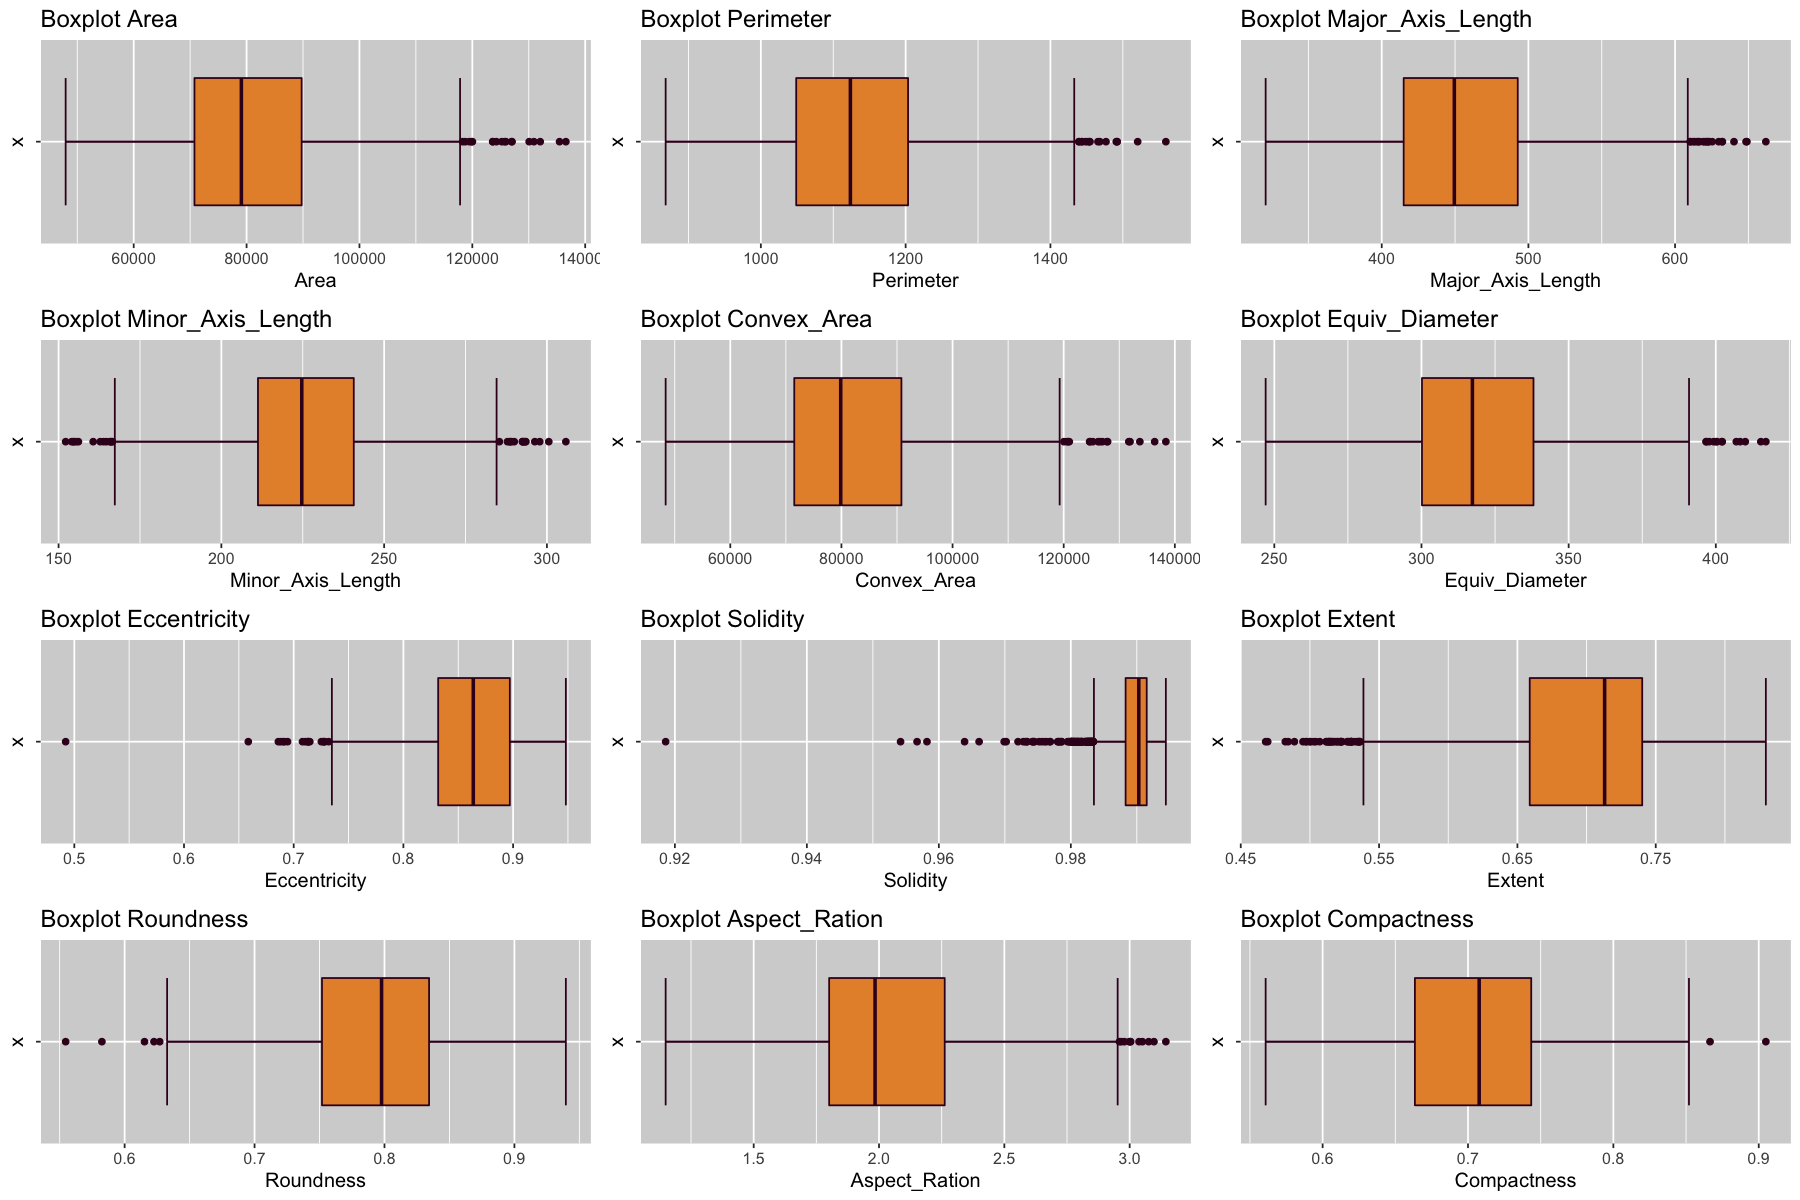

In [89]:
box_plots = list()
var_data = colnames(data_cb_numericas)

for (variable in var_data) {
  box_plot = ggplot(data_cb_numericas, aes(x = '', y = !!sym(variable))) +
    stat_boxplot(geom = 'errorbar', color = '#3c0023', na.rm = TRUE) +
    geom_boxplot(fill = '#e69138', color = '#3c0023', na.rm = TRUE) +
    coord_flip() +
    labs(title = paste('Boxplot', variable), y = variable) +
    theme(panel.background = element_rect(fill = 'lightgray'),
        panel.grid.major = element_line(color = 'white'),
        panel.grid.minor = element_line(color = 'white')) +
    theme(text = element_text(size = 12))
  box_plots[[variable]] = box_plot
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10 
)
grid.arrange(grobs = box_plots, ncol = 3, widths = rep(2, 3))

Por suerte, las métricas siguen una **distribución normal**, tanto en el barplot como en el boxplot. Solo destacamos los outliers de **Solidity** y **Eccentricity**.

Para ello, vamos a analizar ambas variables, para intentar comprender si dichos outliers (sobretodo los mins) no se tratan de un error en nuestros datos. Cabe destacar que el dominio de las calabazas no es mi fuerte (si hablamos de verduras :( ).

#### - Solidity

In [150]:
indice_outlier = which.min(data_cb$Solidity)

info_outlier = data_cb[indice_outlier, ]

data_cb_class_0 = subset(data_cb, Class == 0)

medias = colMeans(data_cb_class_0, na.rm = TRUE)

info_outlier_con_medias = rbind(info_outlier, medias)

diferencia = info_outlier_con_medias[1, ] - info_outlier_con_medias[2, ]

info_outlier_con_medias = rbind(info_outlier_con_medias, diferencia)

info_outlier_con_medias = info_outlier_con_medias[, order(-abs(diferencia))]

info_outlier_con_medias

,Area,Convex_Area,Minor_Axis_Length,Equiv_Diameter,Major_Axis_Length,Perimeter,Aspect_Ration,Roundness,Extent,Compactness,Solidity,Eccentricity,Class
1726,65353.00,71144.00,177.07890,288.4615,507.2473,1187.42500,2.8645000,0.5825000,0.5411000,0.5687000,0.91860000,0.937100,0
2,83079.54,83914.81,216.06441,323.8202,489.4585,1174.43192,2.2790537,0.7525698,0.6782401,0.6639915,0.98993758,0.893749,0
17261,-17726.54,-12770.81,-38.98551,-35.3587,17.7888,12.99308,0.5854463,-0.1700698,-0.1371401,-0.0952915,-0.07133758,0.043351,0


Para analizar si dicho outlier se trata de un error, hemos comparado la observación que tiene el outlier con la media (de la clase de la observación con el outlier). Si nos fijamos, las variables de Área són las que más diferencian a esta calabaza de la del resto de su misma clase. Si investigamos un poco sobre las calabazas Çerçevelik, podemos ver que són las típicas calabazas de Halloween. Intuio que, para la observación del outlier, se trataria de una calabaza mas pequeña que el resto.

#### - Eccentricity

In [153]:
indice_outlier = which.min(data_cb$Eccentricity)

info_outlier = data_cb[indice_outlier, ]

data_cb_class_1 = subset(data_cb, Class == 1)

medias = colMeans(data_cb_class_1, na.rm = TRUE)

info_outlier_con_medias = rbind(info_outlier, medias)

diferencia = info_outlier_con_medias[1, ] - info_outlier_con_medias[2, ]

# Agrega una tercera fila con la diferencia
info_outlier_con_medias = rbind(info_outlier_con_medias, diferencia)

# Ordena las columnas por la magnitud de la diferencia (de mayor a menor)
info_outlier_con_medias = info_outlier_con_medias[, order(-abs(diferencia))]

# Muestra la información
info_outlier_con_medias

,Area,Convex_Area,Major_Axis_Length,Perimeter,Minor_Axis_Length,Equiv_Diameter,Aspect_Ration,Eccentricity,Compactness,Extent,Roundness,Solidity,Class
1195,66204.00,67295.00,320.8446,1006.74300,279.30010,290.33350,1.1487000,0.4921000,0.9049000,0.63150000,0.820800000,0.983800000,1
2,78423.15,79286.49,426.2726,1089.52249,234.77693,315.19333,1.8226088,0.8305382,0.7411627,0.70701785,0.827498538,0.989079923,1
11951,-12219.15,-11991.49,-105.4280,-82.77949,44.52317,-24.85983,-0.6739088,-0.3384382,0.1637373,-0.07551785,-0.006698538,-0.005279923,0


En este caso, nos centramos en la calabaza Urgup_Sivrisi. Estas calabazas són más usadas para extraer las pipas. En este caso, vemos como la calabaza que nos genera el outlier también es más pequeña. No solo eso, sino que si nos fijamos en la variable que genera el outlier (Eccentricity), podemos ver como esta lejos del 0, lo que significa que tiene una forma menos circular (más parecido a una elipse). 

Tanto para Solidity como Eccentricity, podriamos llegar a eliminar ambas observaciones sin problemas. Aún así (spoiler) veremos como las dos variables no acaban teniendo demasiado impacto a la hora de diferenciar la clase, así que por ahora las mantendremos.

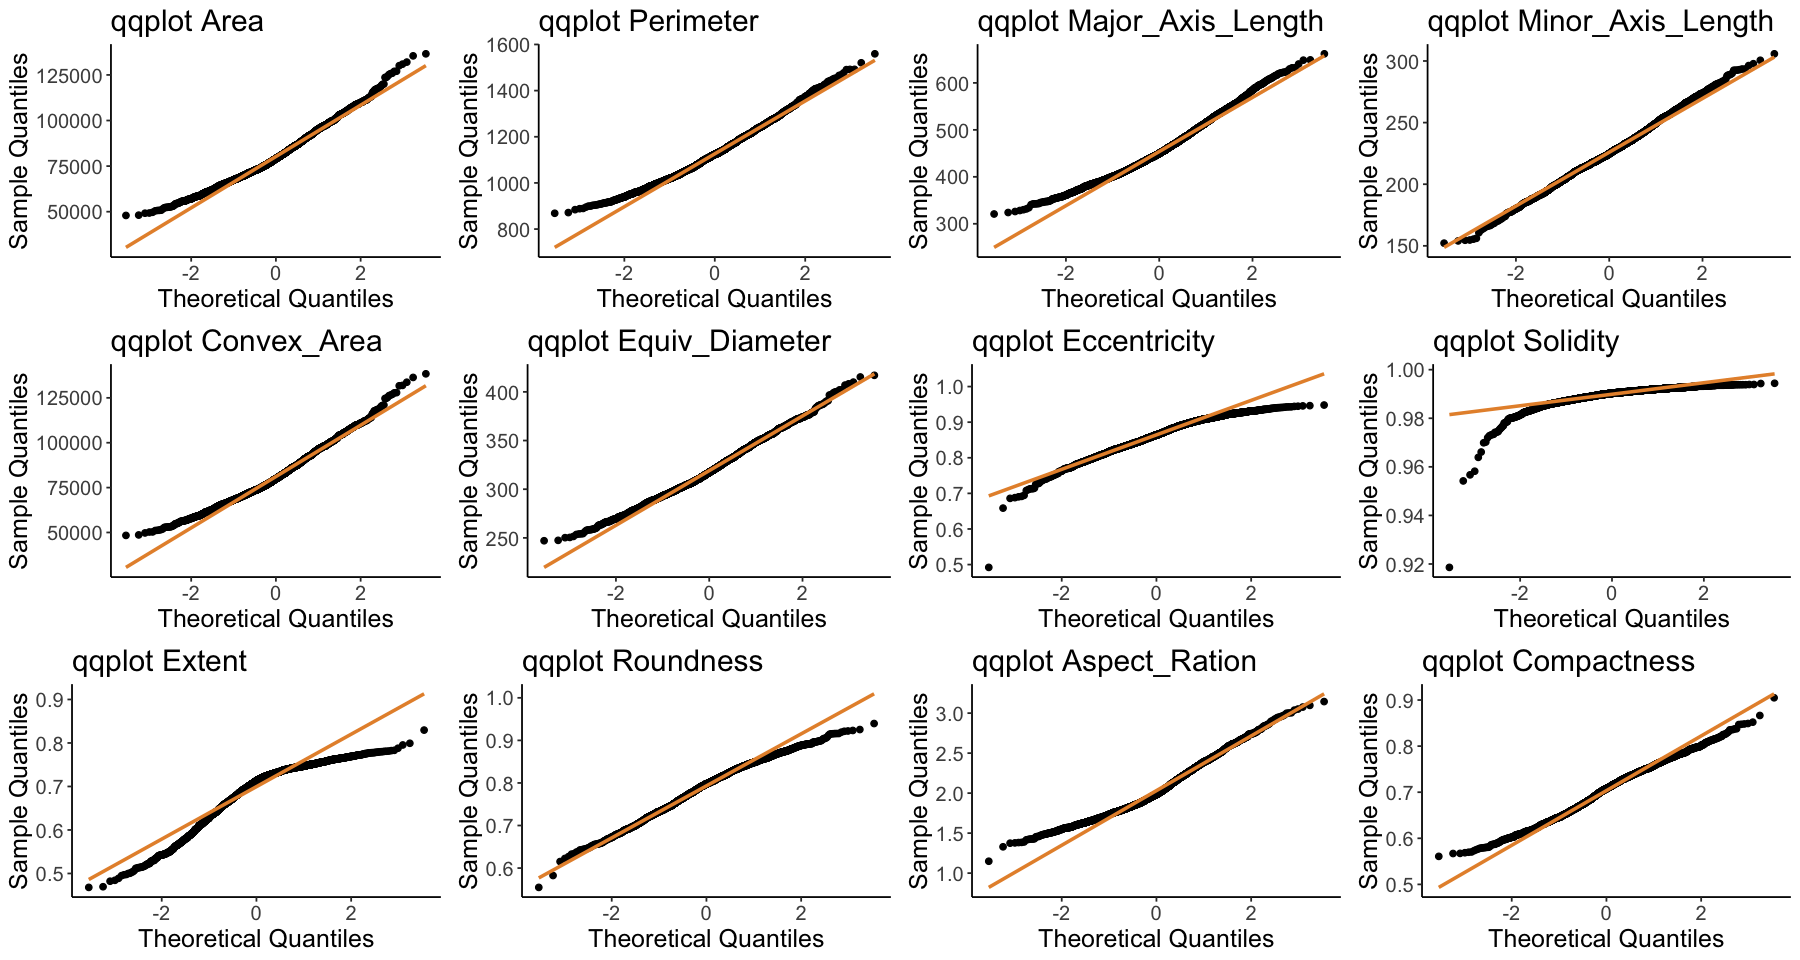

In [91]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_cb_numericas)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_cb_numericas[!is.na(data_cb_numericas[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

De nuevo, nuestras variables siguen una distribución normal. 

### <font color='#3d59c6'>  1.3.2 Variables categóricas </font>

In [92]:
data_cb_cat = sapply(data_cb, is.factor)

data_cb$Class <- as.numeric(data_cb$Class == "Çerçevelik")

data_cb_cat = data_cb["Class"]

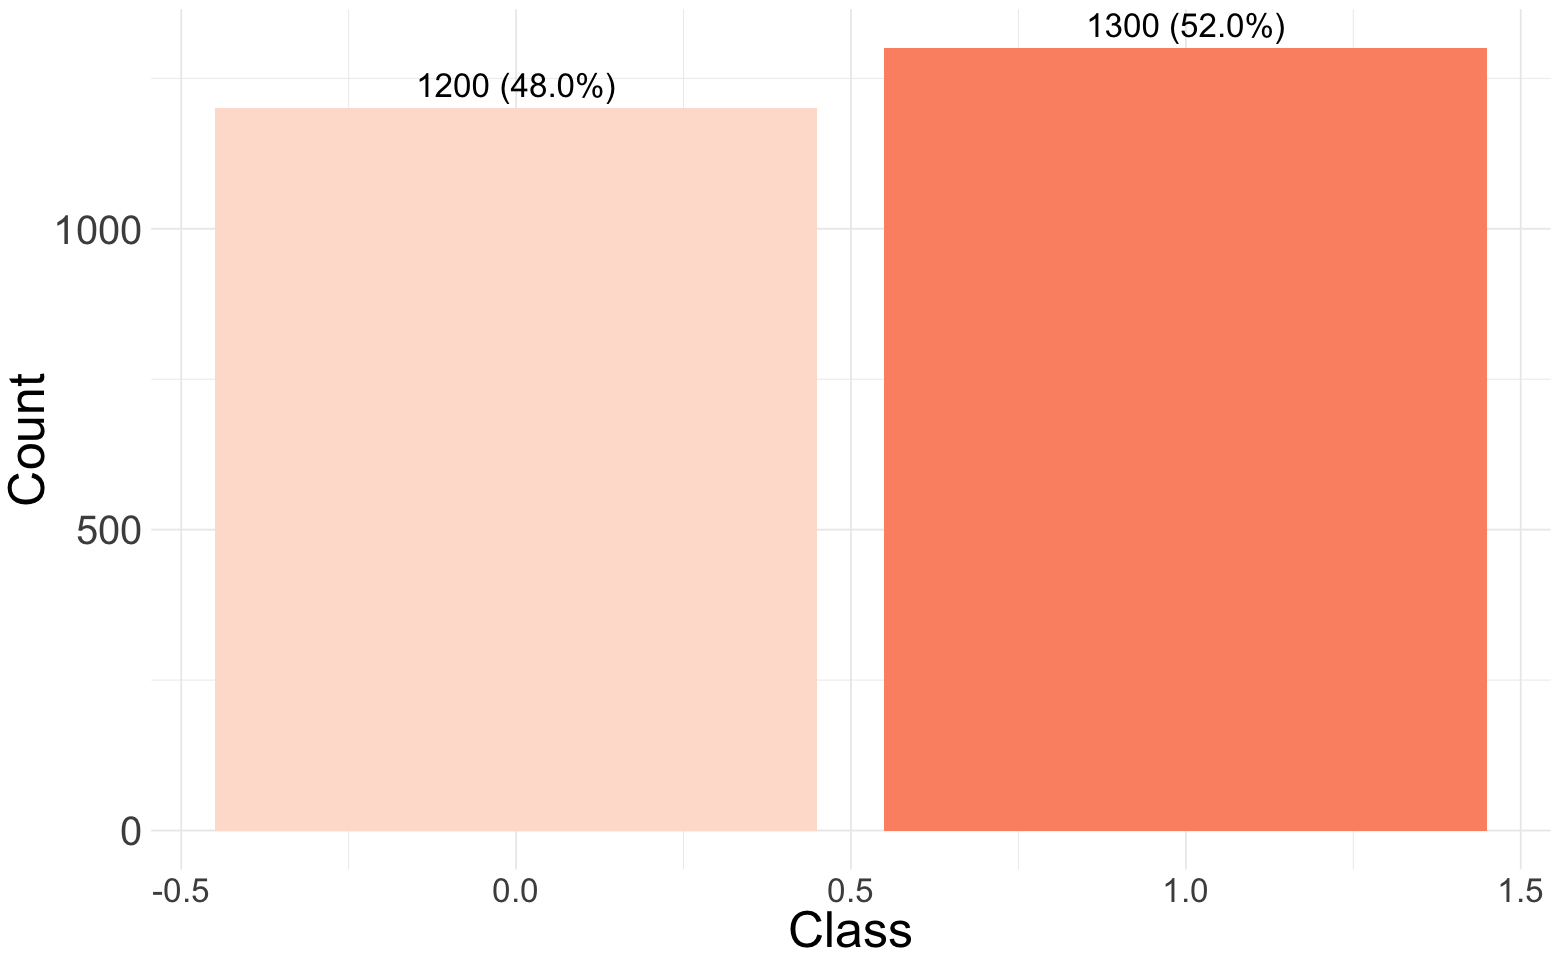

In [93]:

options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)
bar_plots = list()
var_data_cat_list = data_cb_cat
var_data_cat = lapply(var_data_cat_list, list)

for (variable in names(var_data_cat)) {
  bar_plot = ggplot(data_cb_cat, aes(x = !!sym(variable), fill = as.factor(!!sym(variable)))) +
    geom_bar(stat = 'count', position = 'dodge') +
    scale_fill_brewer(palette = 'Reds') + 
    labs( x = variable, y = 'Count') +
    theme_minimal() +
    theme(legend.position = 'none', text = element_text(size = 30),axis.text.x = element_text(size = 20)) +
    geom_text(
      stat = 'count',
      aes(label = sprintf('%d (%.1f%%)', stat(count), stat(count) / sum(stat(count)) * 100)),
      position = position_dodge(0.9),
    vjust = -0.5,
    size=7
    )
  
  bar_plots[[variable]] = bar_plot
}

grid.arrange(grobs = bar_plots, ncol = 1, widths = rep(1, 1))

Siempre que usemos un algoritmo de clasificación (Regresión Logística, Árbol de Decisión) el equilibrio de datos entre clases es crucial, para que los resultados no se vean sesgados. Cierto es que hay métodos para ponderar/equilibrar los datos para un árbol de decisión (por ejemplo), o para generar datos sintéticos, pero no dejan de ser aproximaciones que pueden darnos problemas. 

En este caso, vemos como sí hay un equilibrio, por lo que no hace falta preocuparnos por ello. 

## 2. Elección de variables


## <font color='#3d59c6'>  2.1 Análisis de la información mutua </font>


Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”

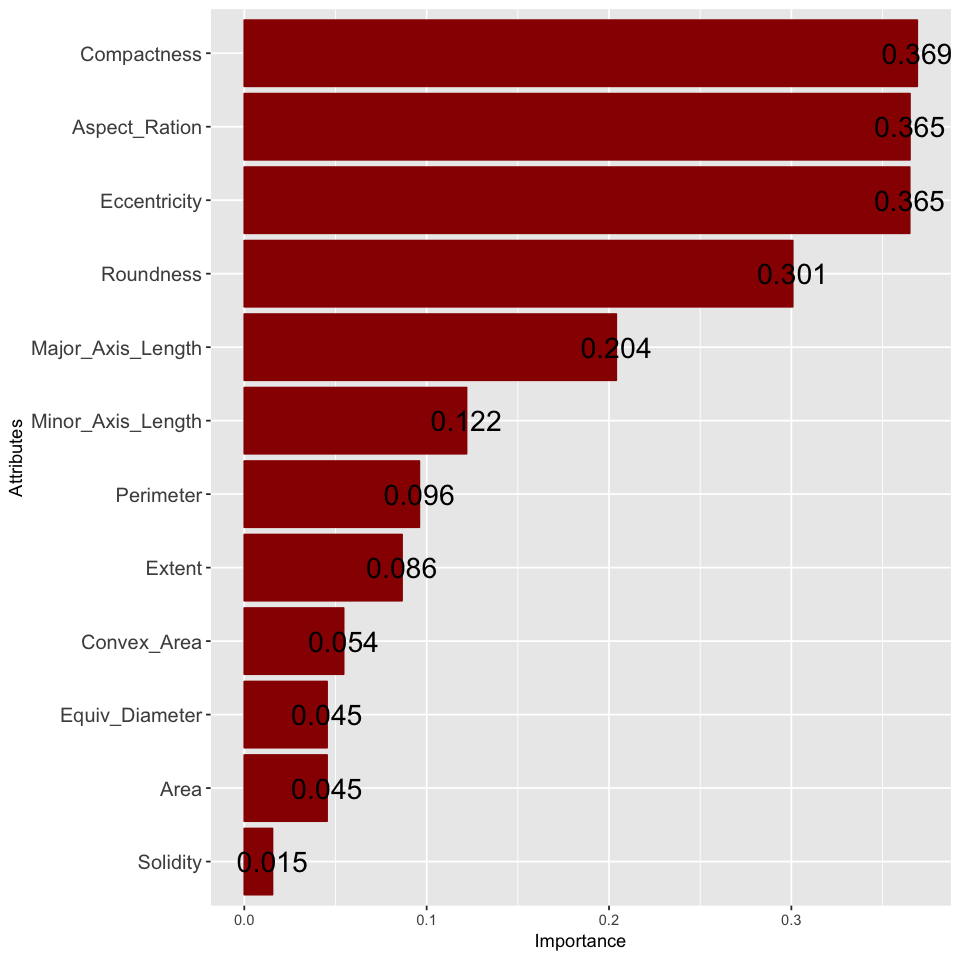

In [94]:
options(repr.plot.width = 8, repr.plot.height = 8 )
ig = information_gain(formula = Class ~ .
                     , data = data_cb
                     , type = 'infogain')

ggplot(ig, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”

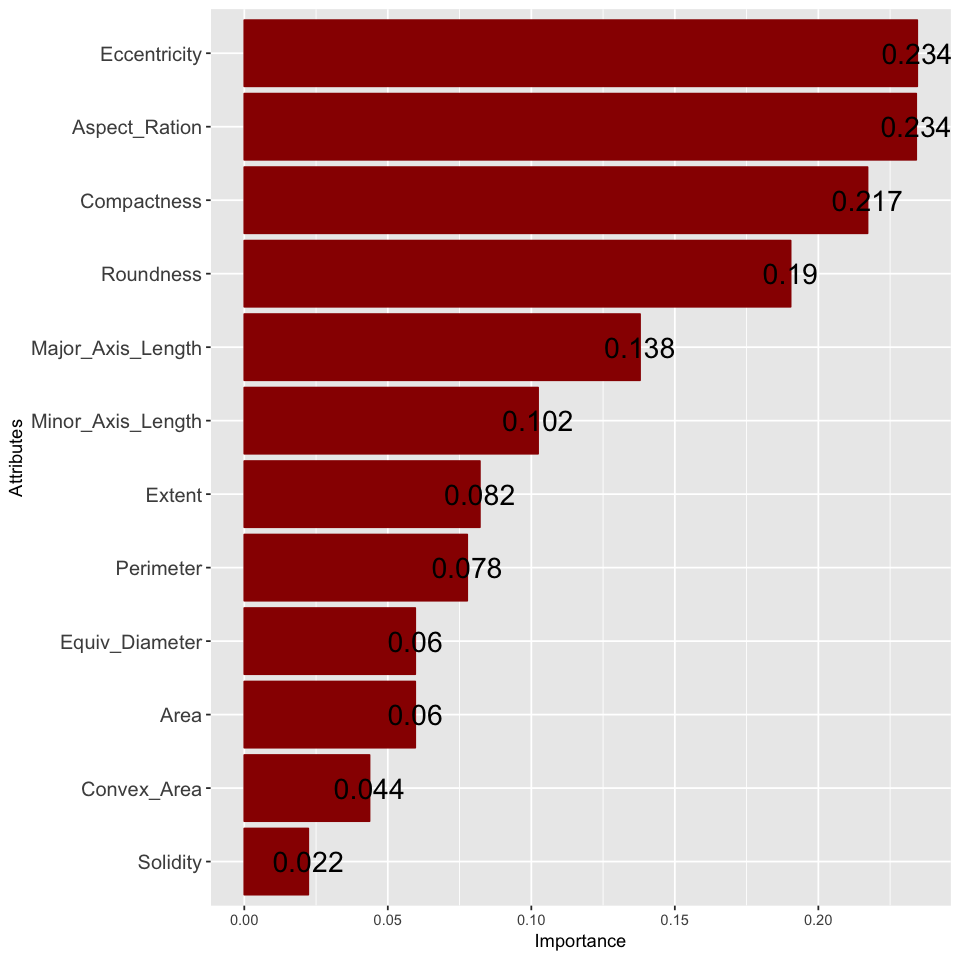

In [95]:
gr = information_gain(formula = Class ~ .
                     , data = data_cb
                     , type = 'gainratio')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
“Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE.”

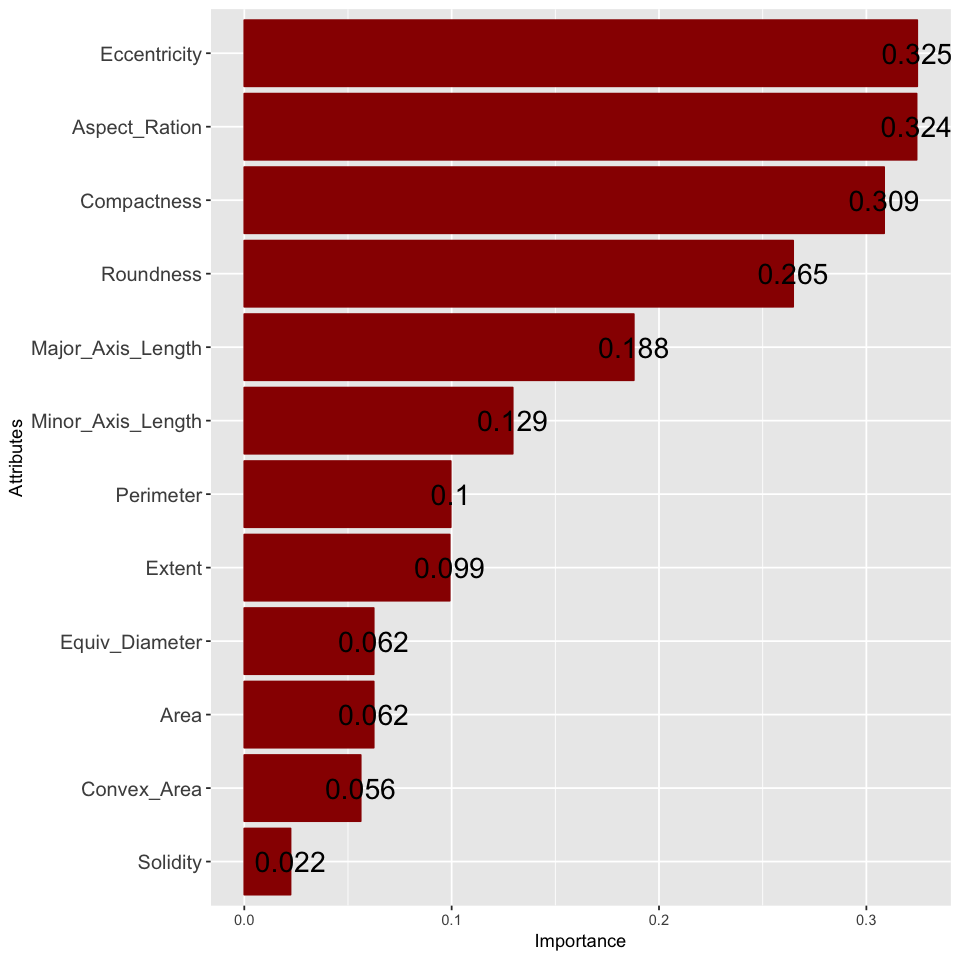

In [96]:
gr = information_gain(formula = Class ~ .
                     , data = data_cb
                     , type = 'symuncert')

ggplot(gr, aes(x = reorder(attributes, +importance), y = importance)) +
 geom_bar(stat = "identity", fill = "#990000", color = "#990000") +
geom_text(aes(label =  round(importance, 3)),  color = "black",size = 6) +  # Agregar etiquetas de valores 
  coord_flip() +
  labs(x = "Attributes", y = "Importance")+
  theme(
    axis.text.y = element_text(size = 12))

In [97]:
data_cb_d = discretize(data_cb)
mutinformation(data_cb_d,method = "mm")



,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,2.567332003,0.92950656,0.46682411,0.33241288,2.366387582,2.567332003,0.026075525,0.022664931,0.005558957,0.01644020,0.025841363,0.025256909,0.02779786
Perimeter,0.929506565,2.56733200,1.01381055,0.11433150,0.934327405,0.929506565,0.139834891,0.012273483,0.026313589,0.14863666,0.139848195,0.139774438,0.09563454
Major_Axis_Length,0.466824111,1.01381055,2.56733200,0.03330718,0.466766515,0.466824111,0.375235873,0.015430945,0.065806953,0.33091889,0.375666890,0.371710037,0.19966293
Minor_Axis_Length,0.332412878,0.11433150,0.03330718,2.56733200,0.333245991,0.332412878,0.230406937,0.012596416,0.056896885,0.18941600,0.230111400,0.232265157,0.11898305
Convex_Area,2.366387582,0.93432740,0.46676651,0.33324599,2.567332003,2.366387582,0.025631077,0.018358470,0.005505394,0.01624600,0.025400246,0.025466860,0.02832684
Equiv_Diameter,2.567332003,0.92950656,0.46682411,0.33241288,2.366387582,2.567332003,0.026075525,0.022664931,0.005558957,0.01644020,0.025841363,0.025256909,0.02779786
Eccentricity,0.026075525,0.13983489,0.37523587,0.23040694,0.025631077,0.026075525,2.567300785,0.003520863,0.198508441,1.25518968,2.547202560,2.308320234,0.36361399
Solidity,0.022664931,0.01227348,0.01543094,0.01259642,0.018358470,0.022664931,0.003520863,2.561745472,0.005967975,0.02790529,0.003988476,0.004440121,0.01630514
Extent,0.005558957,0.02631359,0.06580695,0.05689689,0.005505394,0.005558957,0.198508441,0.005967975,2.567327794,0.19849789,0.199415515,0.203390417,0.08215330
Roundness,0.016440201,0.14863666,0.33091889,0.18941600,0.016245996,0.016440201,1.255189683,0.027905291,0.198497894,2.56732158,1.256431953,1.281843797,0.29866643


Para el análisis de información mútua se ha usado la función **information_gain()** con las tres configuraciones vistas en clase (infogain,gainratio y symuncert). Además, con la libreria infotheo, también se ha sacado la información mútua, para tener más contraste en los resultados.

Dicho esto, para cada test, las variables ha destacar siempre han estado las mismas:

- Compactness
- Aspect_Ratio
- Eccentricity
- Roundness

## <font color='#3d59c6'>  2.2 Estudio de la correlación entre las variables </font>



In [98]:
round(cov(data_cb_numericas), 3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,186718839.782,1386262.605,606396.331,218163.549,188043075.203,366900.493,98.518,7.561,-11.668,-114.150,690.698,-116.339
Perimeter,1386262.605,11936.965,5813.440,1000.111,1398505.094,2726.732,2.293,0.025,-0.936,-3.061,16.844,-2.809
Major_Axis_Length,606396.331,5813.440,3162.454,130.196,610759.811,1190.287,1.789,0.023,-0.736,-2.154,12.957,-2.169
Minor_Axis_Length,218163.549,1000.111,130.196,542.762,219858.997,432.303,-0.622,0.007,0.331,0.728,-4.406,0.746
Convex_Area,188043075.203,1398505.094,610759.811,219858.997,189450250.284,369509.406,98.946,6.693,-12.953,-118.244,695.130,-117.182
Equiv_Diameter,366900.493,2726.732,1190.287,432.303,369509.406,723.175,0.190,0.015,-0.018,-0.219,1.324,-0.223
Eccentricity,98.518,2.293,1.789,-0.622,98.946,0.190,0.002,0.000,-0.001,-0.002,0.014,-0.002
Solidity,7.561,0.025,0.023,0.007,6.693,0.015,0.000,0.000,0.000,0.000,0.000,0.000
Extent,-11.668,-0.936,-0.736,0.331,-12.953,-0.018,-0.001,0.000,0.004,0.001,-0.006,0.001
Roundness,-114.150,-3.061,-2.154,0.728,-118.244,-0.219,-0.002,0.000,0.001,0.003,-0.017,0.003


Como ya hemos ido viendo, la matriz de covariança no esta normalizada, por lo que resulta difícil comprender relaciones entre variables. Para ello, vamos a usar la matriz de correlación

In [99]:
round(cor(data_cb_numericas), 3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.000,0.929,0.789,0.685,1.000,0.998,0.160,0.158,-0.014,-0.149,0.160,-0.160
Perimeter,0.929,1.000,0.946,0.393,0.930,0.928,0.465,0.065,-0.141,-0.501,0.488,-0.484
Major_Axis_Length,0.789,0.946,1.000,0.099,0.789,0.787,0.704,0.119,-0.215,-0.685,0.729,-0.727
Minor_Axis_Length,0.685,0.393,0.099,1.000,0.686,0.690,-0.591,0.091,0.234,0.559,-0.598,0.603
Convex_Area,1.000,0.930,0.789,0.686,1.000,0.998,0.159,0.139,-0.015,-0.154,0.160,-0.160
Equiv_Diameter,0.998,0.928,0.787,0.690,0.998,1.000,0.156,0.159,-0.011,-0.145,0.156,-0.156
Eccentricity,0.160,0.465,0.704,-0.591,0.159,0.156,1.000,0.044,-0.327,-0.891,0.950,-0.982
Solidity,0.158,0.065,0.119,0.091,0.139,0.159,0.044,1.000,0.068,0.201,0.026,-0.020
Extent,-0.014,-0.141,-0.215,0.234,-0.015,-0.011,-0.327,0.068,1.000,0.352,-0.330,0.337
Roundness,-0.149,-0.501,-0.685,0.559,-0.154,-0.145,-0.891,0.201,0.352,1.000,-0.935,0.933


Dada la cantidad de variables, mejor graficar dicha matriz, para observar mejor las relaciones

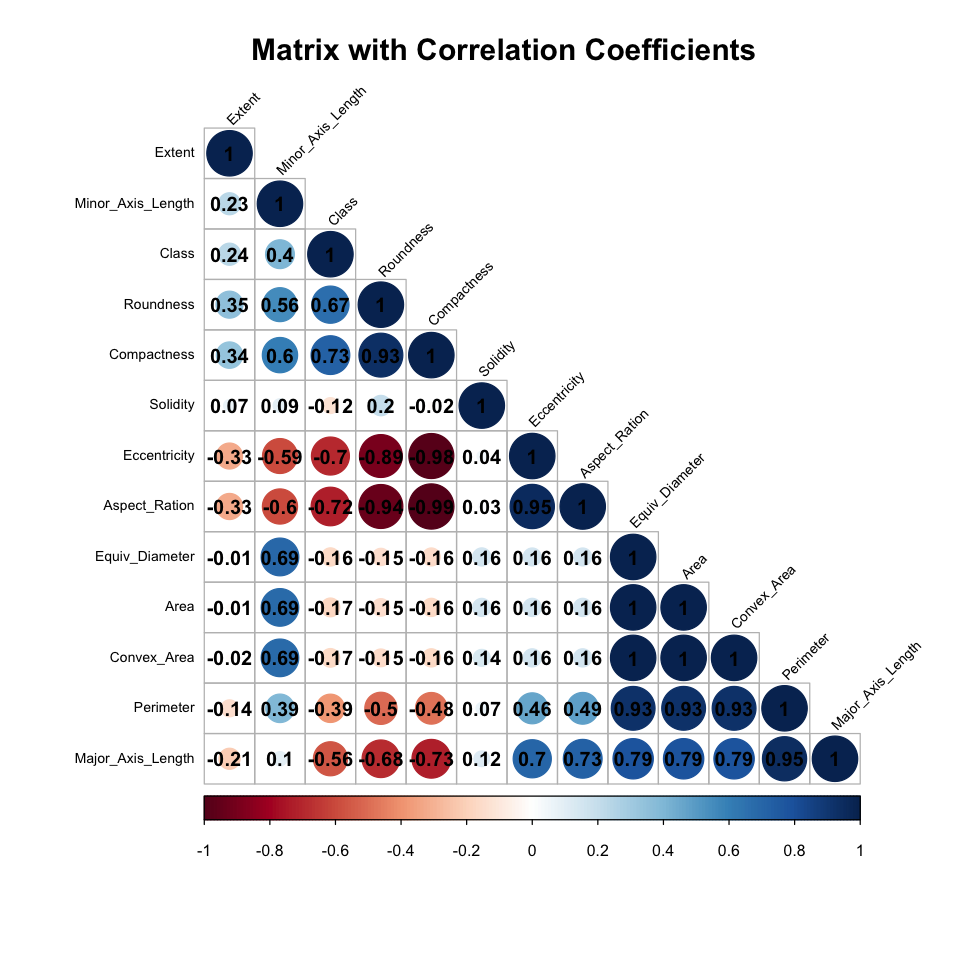

In [100]:

par(bg = "white")

# Correlation matrix using corrplot
cor_matrix <- cor(data_cb)

# Customize corrplot appearance
corrplot(cor_matrix,
         method = "circle",
         type = "lower",
         order = "hclust",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 1,
         tl.cex = 0.7)

# Add a title
title("Matrix with Correlation Coefficients", cex.main = 1.5)



Gracias a este gráfico, podemos apreciar que hay zonas con una gran correlación (~95%). Las acciones a hacer con dichas correlaciones lo veremos más adelante, una vez decididas las variables para el modelo.

Si nos centramos en las correlaciones de las variables explicativas con la objetivo, podemos ver como las variables observadas en la información mútua tienen una gran correlación con Class. Además, los Axis_Lenghts también podrian ser variables a considerar. Vamos a seguir con el análisis de PCA

## <font color='#3d59c6'>  2.2 Estudio de las componentes principales </font>



In [101]:
data_cb_cor= data_cb %>%
  select(-Class)

acp = princomp(data_cb_cor,cor=TRUE)
summary(acp)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.4307445 2.0195727 1.01982672 0.91591423 0.292751879
Proportion of Variance 0.4923766 0.3398895 0.08667054 0.06990824 0.007141972
Cumulative Proportion  0.4923766 0.8322661 0.91893660 0.98884484 0.995986813
                            Comp.6       Comp.7      Comp.8       Comp.9
Standard deviation     0.194311691 0.0753152803 0.058499025 3.220710e-02
Proportion of Variance 0.003146419 0.0004726993 0.000285178 8.644146e-05
Cumulative Proportion  0.999133233 0.9996059319 0.999891110 9.999776e-01
                            Comp.10      Comp.11      Comp.12
Standard deviation     1.311665e-02 9.639334e-03 2.102475e-03
Proportion of Variance 1.433721e-05 7.743063e-06 3.683666e-07
Cumulative Proportion  9.999919e-01 9.999996e-01 1.000000e+00

In [102]:
loadings(acp)


Loadings:
                  Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
Area               0.305  0.332                              0.141  0.523
Perimeter          0.380  0.181               -0.219         0.223 -0.392
Major_Axis_Length  0.409                              0.310  0.341 -0.360
Minor_Axis_Length         0.491                      -0.148 -0.726 -0.136
Convex_Area        0.305  0.331                              0.136  0.512
Equiv_Diameter     0.304  0.333                             -0.122 -0.335
Eccentricity       0.312 -0.299 -0.107         0.646 -0.493              
Solidity                        -0.928  0.277 -0.196 -0.121              
Extent            -0.116  0.155 -0.268 -0.944                            
Roundness         -0.307  0.297 -0.156  0.113  0.650  0.512        -0.146
Aspect_Ration      0.318 -0.303               -0.149  0.582 -0.414  0.110
Compactness       -0.320  0.306               -0.166 -0.117  0.265       
                  Comp.9 Co

Podemos ver como con 2/3 componentes explicamos hasta un 82% de la varianza total. Además, tenemos nuevas variables a considerar:

- Para la componente 1: Major_Axis_Length
- Para la componente 2: Minor_Axis_Length

Además, ambas variables estan relativamente arriba por lo que hace a información mutua, por lo que las podemos considerar como adecuadas.

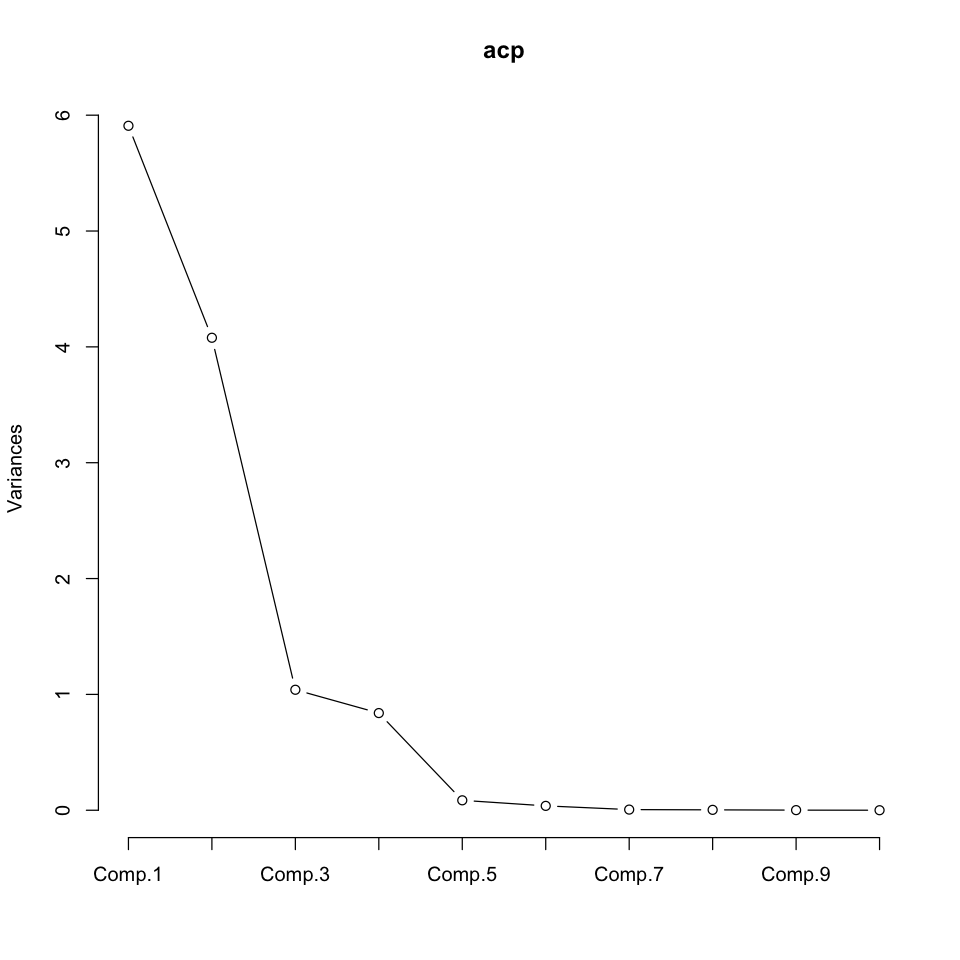

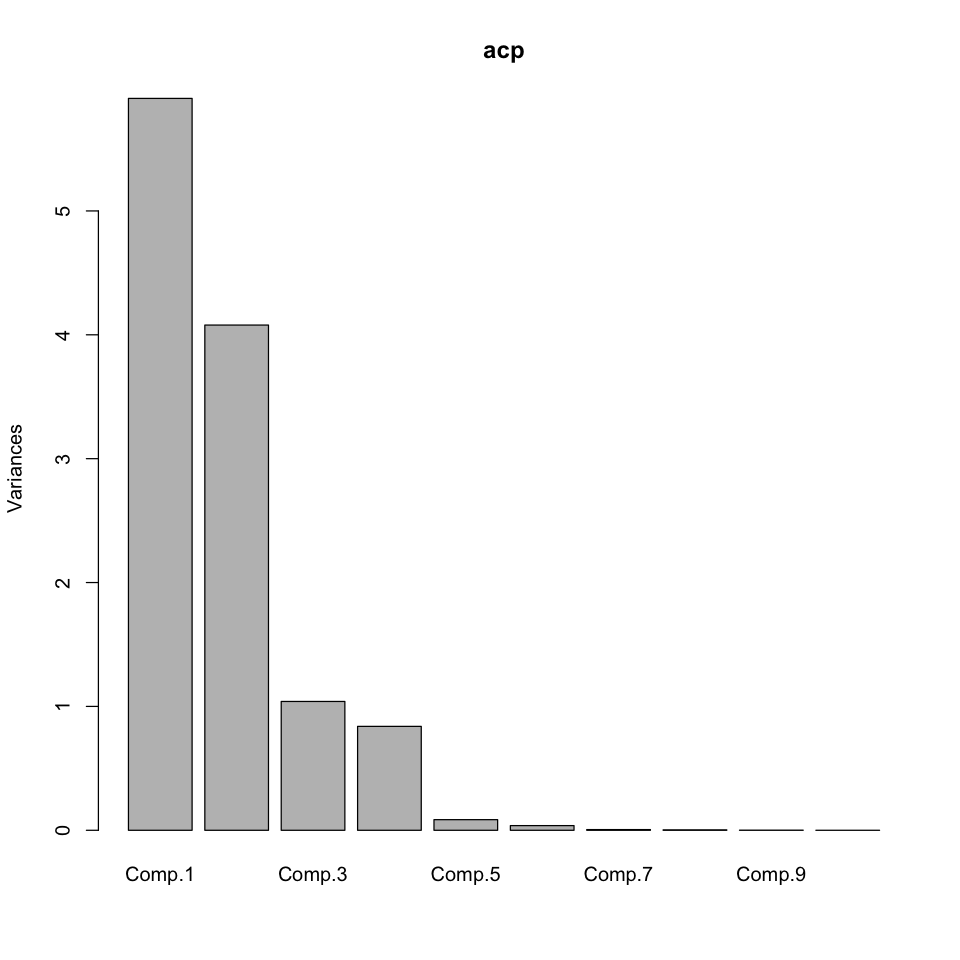

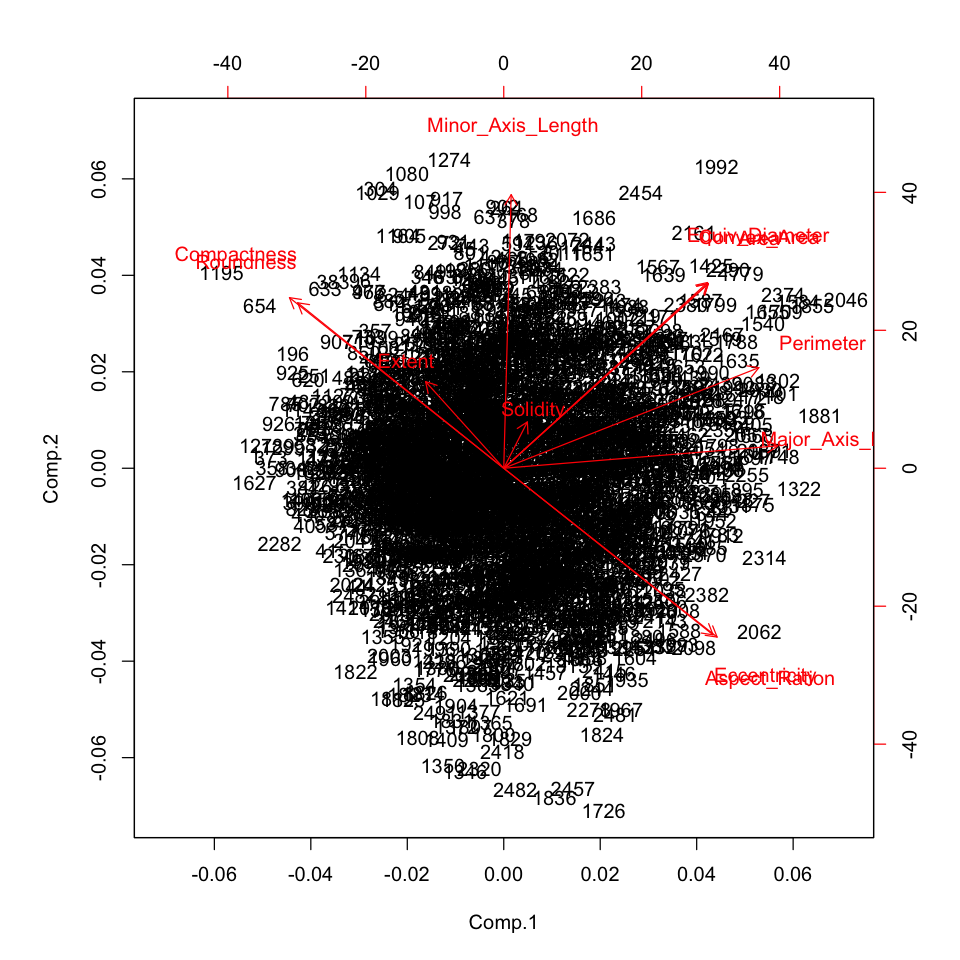

In [103]:
par(bg = "white")
plot(acp, type="lines")
plot(acp)
biplot(acp)

Si empezamos a hablar de las correlaciones, ligado a las variables que estamos escogiendo, podemos ver como las cuatro variables seleccionadas en el apartado de mutual infromation estan altamelte correlacionadas (estan en la mísma linea en la gráfica de arriba). Además, en la matriz de correlación, estas guardan una gran relación.

In [104]:
mcomponentes = cor(data_cb_cor,predict(acp)[,1:3])
mcomponentes
apply(mcomponentes*mcomponentes,1,sum)

,Comp.1,Comp.2,Comp.3
Area,0.74115890,0.66970928,0.01961356
Perimeter,0.92470142,0.36462904,0.07511271
Major_Axis_Length,0.99302598,0.08127994,-0.03333330
Minor_Axis_Length,0.02701914,0.99155081,0.09726238
Convex_Area,0.74159627,0.66845340,0.03832046
Equiv_Diameter,0.73840979,0.67313961,0.01864449
Eccentricity,0.75861577,-0.60371674,-0.10886198
Solidity,0.08553342,0.16782715,-0.94663290
Extent,-0.28312127,0.31384925,-0.27294155
Roundness,-0.74697947,0.59969827,-0.15941730


Area         Perimeter Major_Axis_Length Minor_Axis_Length 
        0.9982117         0.9936690         0.9938181         0.9933630 
      Convex_Area    Equiv_Diameter      Eccentricity          Solidity 
        0.9982634         0.9987136         0.9518227         0.9315958 
           Extent         Roundness     Aspect_Ration       Compactness 
        0.2531561         0.9430302         0.9795303         0.9920653

In [105]:
resultados_anova = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = names(data_cb_cor)

for (variable in variables) {
  formula = as.formula(paste(variable, '~ Class'))
  anova_result = aov(formula, data = data_cb)
  
  # Extraer F value y p-value
  f_value = summary(anova_result)[[1]][['F value']][1]
  p_value = summary(anova_result)[[1]][['Pr(>F)']][1]
 resultados_anova = rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

            Variable    F_Value       P_Value
1               Area   74.59327  1.013240e-17
2          Perimeter  443.63412  8.682216e-91
3  Major_Axis_Length 1149.96600 1.108998e-207
4  Minor_Axis_Length  479.67998  2.079533e-97
5        Convex_Area   72.57742  2.732434e-17
6     Equiv_Diameter   65.88394  7.425085e-16
7       Eccentricity 2390.90077  0.000000e+00
8           Solidity   38.16649  7.560815e-10
9             Extent  147.43488  5.263276e-33
10         Roundness 2029.40317  0.000000e+00
11     Aspect_Ration 2716.92322  0.000000e+00
12       Compactness 2795.02244  0.000000e+00


Por sorpresa para nosotros, las 4 variables escogidas con el Information Gain Algorithms no rechazan la hipotesis nula (No existen diferencias significativas entre las medias de los grupos), por lo que, a priori, no deberian ser variables a considerar, ya que no nos dejarian ver diferencia entre clases. Aun así, las vamos a considerar y observar que le pasa al modelo de regresión logística.

En resumen, las variables con potencial observadas han estado:

- Análisis Correlaciones: Compactness, Roundness, Eccentricity, Aspect_Ration
- Realización IGA - Information Gain Algorithms: Compactness, Roundness, Eccentricity, Aspect_Ration
- Análisis PCA: Major_Axis_Length, Minor_Axis_Length


## 3. Desarrollo de un modelo de Regresión logística

In [111]:
data_cb_num_subset = subset(data_cb, select = c(Class, Compactness, Roundness, Eccentricity, Aspect_Ration, Major_Axis_Length, Minor_Axis_Length, Solidity))

Tal y como hemos ido intuiendo, se debe hacer una limpieza de variables, ya que existe una gran correlación entre algunas de ellas. Vamos a visualizarlo mejor con un pairplot:

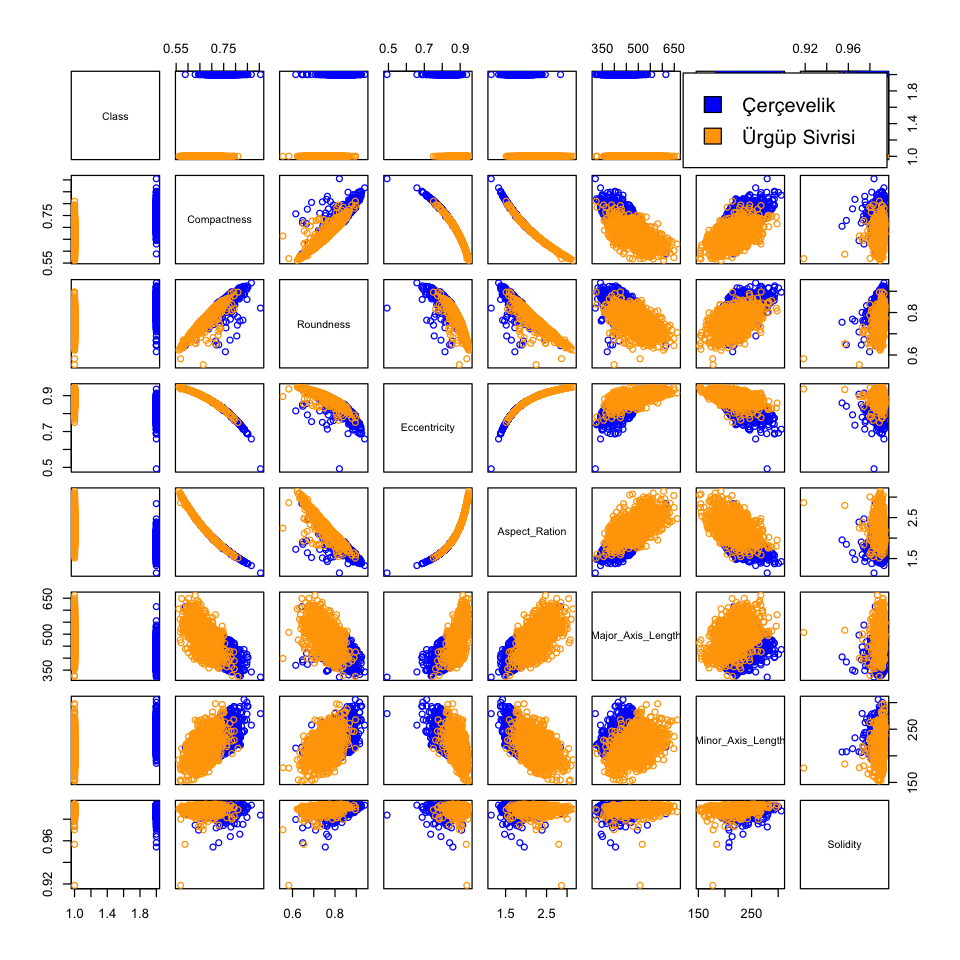

In [112]:

par(bg = "white")
data_cb_num_subset$Class <- as.factor(data_cb_num_subset$Class)
colores_factor <- ifelse(data_cb_num_subset$Class == 1, "blue", "orange")

pairs(data_cb_num_subset, col = colores_factor)
par(xpd = TRUE)
legend("topright", fill = c("blue", "orange"), legend = c("Çerçevelik","Ürgüp Sivrisi"))



,Class,Compactness,Roundness,Eccentricity,Aspect_Ration,Major_Axis_Length,Minor_Axis_Length,Solidity
2495,0,0.6774,0.7626,0.8863,2.1594,470.3888,217.8296,0.9889
2496,0,0.5973,0.6672,0.9340,2.7996,533.1513,190.4367,0.9907
2497,0,0.6433,0.7444,0.9101,2.4134,462.9416,191.8210,0.9919
2498,0,0.6599,0.7549,0.8990,2.2828,507.2200,222.1872,0.9920
2499,0,0.6359,0.7185,0.9130,2.4513,501.9065,204.7531,0.9890
2500,0,0.7104,0.7933,0.8621,1.9735,462.8951,234.5597,0.9901


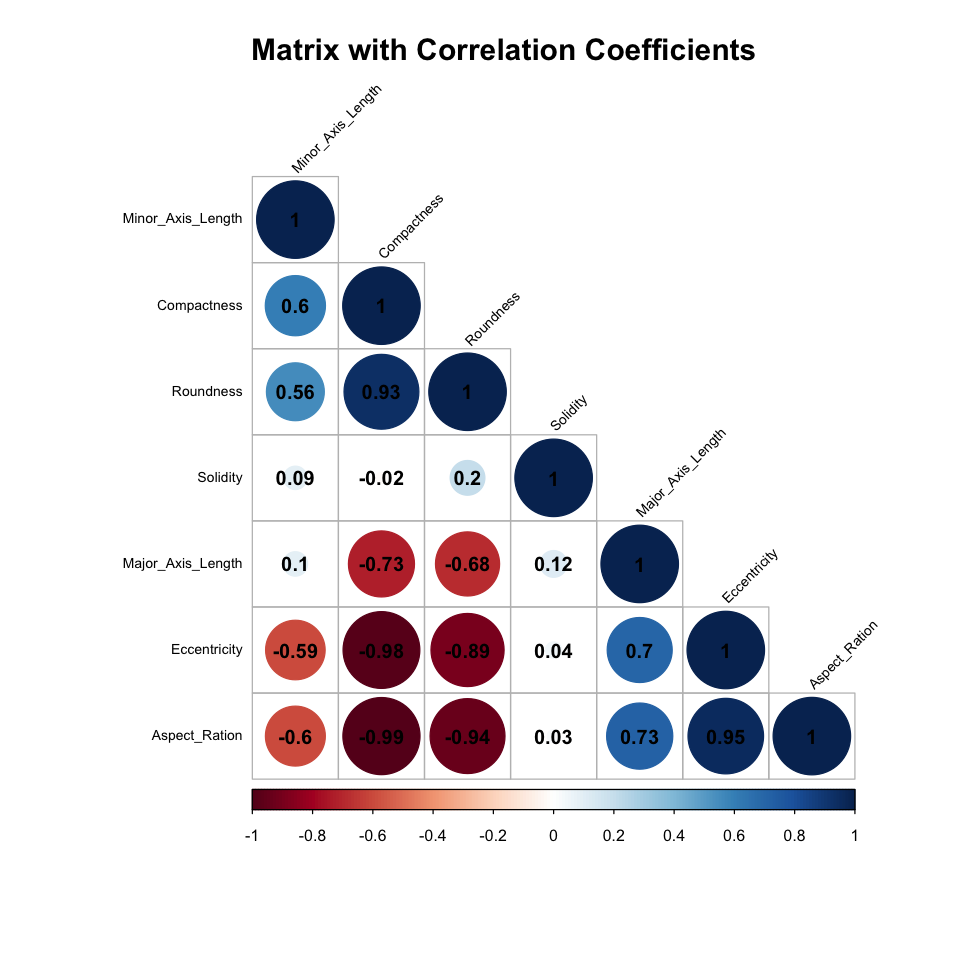

In [117]:
cor_matrix <- cor(data_cb_num_subset[,-1])

corrplot(cor_matrix,
         method = "circle",
         type = "lower",
         order = "hclust",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 1,
         tl.cex = 0.7)

title("Matrix with Correlation Coefficients", cex.main = 1.5)

Y efectivamente, las 4 variables estrella estan altamelte correlacionadas entre ellas (Compactness, Roundness, Eccentricity, Aspect_Ration). Para ello, nos vamos a quedar con la que tenga mayor correlación con la variable Class: **Compactness**

### Así quedan las variables escogidas:

- Análisis Correlaciones: Compactness
- Realización IGA - Information Gain Algorithms: Compactness
- Análisis PCA: Major_Axis_Length, Minor_Axis_Length

In [118]:
set.seed(5)
inTrain = createDataPartition(y = data_cb$Class
                                  , p = .80
                                  , list = FALSE
                                  , times = 1)
data_cb.train = data_cb[inTrain,]
data_cb.test = data_cb[-inTrain,]

ctrain = data_cb$Class[inTrain]
ctest = data_cb$Class[-inTrain]

### - Regresión Logística con 1 variable: Compactness

Dado que Compactness es la variable que, en general, ha demostrado tener más información mútua y es la que tiene mayor relación con la variable objetivo Class, vamos a desarrollar un primer modelo usando solo esa variable. El objetivo es, en parte, experimentar luego con la accuracy de este modelo en comparación con otros modelos (usando distintas variables).

In [119]:
rl1 = glm(formula = Class ~ Compactness
          , data = data_cb.train
          , family = "binomial")
summary(rl1)


Call:
glm(formula = Class ~ Compactness, family = "binomial", data = data_cb.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2925  -0.4008   0.0676   0.4800   3.6627  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -41.332      1.809  -22.85   <2e-16 ***
Compactness   58.847      2.565   22.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1302.4  on 1998  degrees of freedom
AIC: 1306.4

Number of Fisher Scoring iterations: 6


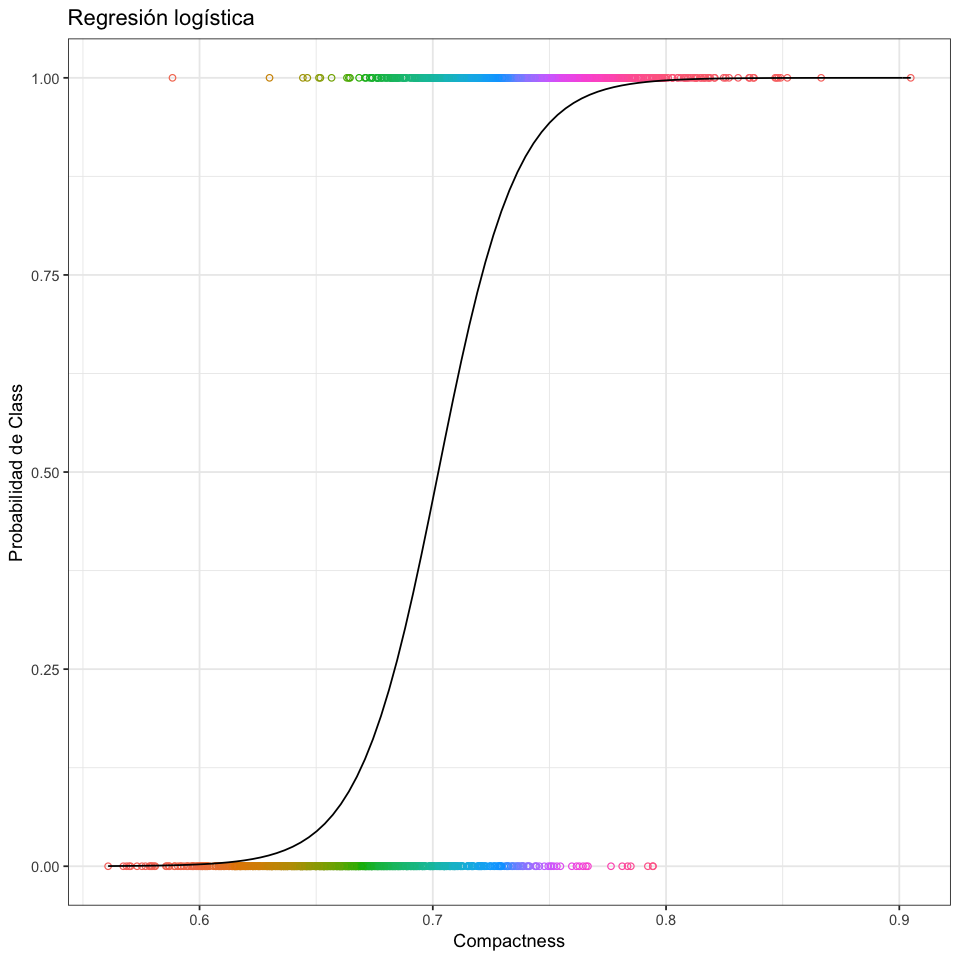

In [120]:
options(repr.plot.width = 8,  repr.plot.height = 8  )
ggplot(data = data_cb.train, aes(x = Compactness, y = Class)) +
  geom_point(aes(color = as.factor(Compactness)), shape = 1) + 
  stat_function(fun = function(x){predict(rl1,
                                          newdata = data.frame(Compactness = x),
                                          type = "response")}) +
  theme_bw() +
  labs(title = "Regresión logística",
       y = "Probabilidad de Class") +
  theme(legend.position = "none")

In [121]:
rl1_prob = predict(rl1, type = 'response')
head(rl1_prob)

1         3         4         5         6         7 
0.9990551 0.3642120 0.9716050 0.9584516 0.9494296 0.9891168

In [122]:
rl1_pred = ifelse(rl1_prob > 0.5, 1, 0)
head(rl1_pred)

1 3 4 5 6 7 
1 0 1 1 1 1

In [124]:
confusionMatrix(as.factor(rl1_pred), as.factor(data_cb.train$Class))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 806 115
         1 156 923
                                          
               Accuracy : 0.8645          
                 95% CI : (0.8487, 0.8792)
    No Information Rate : 0.519           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7282          
                                          
 Mcnemar's Test P-Value : 0.01511         
                                          
            Sensitivity : 0.8378          
            Specificity : 0.8892          
         Pos Pred Value : 0.8751          
         Neg Pred Value : 0.8554          
             Prevalence : 0.4810          
         Detection Rate : 0.4030          
   Detection Prevalence : 0.4605          
      Balanced Accuracy : 0.8635          
                                          
       'Positive' Class : 0               
                              

Para este primer modelo, los resultados son muy buenos. Obtenemos un 86% de accuracy con tan solo una variable. Considerando que queremos clasificar calabazas, seria un modelo perfectamente usable. Aun así, vamos a ver que pasa si usamos la totalidad de variables escogidas

### - Regresión Logística con 3 variable: Compactness / Major_Axis_Length / Minor_Axis_Length

In [154]:
rl3 = glm(formula = Class ~ Compactness + Major_Axis_Length + Minor_Axis_Length
          , data = data_cb.train
          , family = "binomial")
summary(rl3)

rl3_prob = predict(rl3, type = 'response')
rl3_pred = ifelse(rl3_prob > 0.5, 1, 0)

confusionMatrix(as.factor(rl3_pred), as.factor(data_cb.train$Class))


Call:
glm(formula = Class ~ Compactness + Major_Axis_Length + Minor_Axis_Length, 
    family = "binomial", data = data_cb.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4262  -0.3920   0.0620   0.4665   3.6879  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)       -50.194426  18.499444  -2.713  0.00666 **
Compactness        76.287893  26.404876   2.889  0.00386 **
Major_Axis_Length   0.009928   0.020021   0.496  0.62000   
Minor_Axis_Length  -0.035099   0.040725  -0.862  0.38876   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1287.4  on 1996  degrees of freedom
AIC: 1295.4

Number of Fisher Scoring iterations: 6


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 817 117
         1 145 921
                                          
               Accuracy : 0.869           
                 95% CI : (0.8534, 0.8835)
    No Information Rate : 0.519           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7373          
                                          
 Mcnemar's Test P-Value : 0.0953          
                                          
            Sensitivity : 0.8493          
            Specificity : 0.8873          
         Pos Pred Value : 0.8747          
         Neg Pred Value : 0.8640          
             Prevalence : 0.4810          
         Detection Rate : 0.4085          
   Detection Prevalence : 0.4670          
      Balanced Accuracy : 0.8683          
                                          
       'Positive' Class : 0               
                              

: 

Para nuestra sorpresa, solo mejoramos el modelo un **0.03%**. Esto nos indica que, aunque las variables Axis se puedan considerar relevantes, debido a su medio/bajo nivel de información mutua, junto a su correlación con la variable Class media, su impacto para clasificar no se vea reflejado en el modelo.

Por último, vamos a ver qué pasa si incluimos las demás variables que hemos descartado al principio de este apartado:

In [129]:
rlall = glm(formula = Class ~ Compactness + Roundness + Eccentricity + Aspect_Ration + Major_Axis_Length + Minor_Axis_Length
          , data = data_cb.train
          , family = "binomial")
summary(rlall)

rlall_prob = predict(rlall, type = 'response')
rlall_pred = ifelse(rlall_prob > 0.5, 1, 0)

confusionMatrix(as.factor(rlall_pred), as.factor(data_cb.train$Class))


Call:
glm(formula = Class ~ Compactness + Roundness + Eccentricity + 
    Aspect_Ration + Major_Axis_Length + Minor_Axis_Length, family = "binomial", 
    data = data_cb.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3993  -0.3472   0.1181   0.4669   4.0423  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -132.57297   51.90301  -2.554  0.01064 *  
Compactness        149.82368   46.68664   3.209  0.00133 ** 
Roundness          -12.57281    4.55898  -2.758  0.00582 ** 
Eccentricity        63.97857   14.89324   4.296 1.74e-05 ***
Aspect_Ration       -7.38565    6.25367  -1.181  0.23760    
Major_Axis_Length    0.04784    0.02326   2.057  0.03967 *  
Minor_Axis_Length   -0.11077    0.04664  -2.375  0.01754 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.7  on 1999  degrees of freedom
Residual deviance: 1258.

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 810 101
         1 152 937
                                          
               Accuracy : 0.8735          
                 95% CI : (0.8581, 0.8878)
    No Information Rate : 0.519           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7461          
                                          
 Mcnemar's Test P-Value : 0.00167         
                                          
            Sensitivity : 0.8420          
            Specificity : 0.9027          
         Pos Pred Value : 0.8891          
         Neg Pred Value : 0.8604          
             Prevalence : 0.4810          
         Detection Rate : 0.4050          
   Detection Prevalence : 0.4555          
      Balanced Accuracy : 0.8723          
                                          
       'Positive' Class : 0               
                              

Efectivamente, solo se mejora en un 1% el modelo, usando 5 variables extras (comparado con el primer modelo expuesto). Este se debe a la gran correlación de las 3 variables descartadas con Correctness. Por mucho que metamos variables al modelo, si etsas no explican cosas distintas respecto a la variable Class, el modelo no va a mejorar significativamente.

## 4. Conclusiones


Con un total de 2500 observaciones, descritas en 12 variables, hemos generado un modelo de regresión logística que nos permite diferenciar las distintas calabazas (Cercevelik y Urgup_Sivrisi) con un 86% de precisión usando tan solo una variable.

Para conseguir dicho resultado, hemos hecho un exahustivo análisis de la importancia de las variables usando distintas técnicas. Como resumen, las variables candidatas (no las seleccionadas), por cada método han estado las siguientes:

- **Análisis Correlaciones:** Compactness, Roundness, Eccentricity, Aspect_Ration
- **Realización IGA - Information Gain Algorithms:** Compactness, Roundness, Eccentricity, Aspect_Ration
- **Análisis PCA:** Major_Axis_Length, Minor_Axis_Length

De entre estas candidatas, hemos observado que habia una gran correlación (+90%) entre las 4 primeras. Para ello, hemos seleccionado solo la que más explicara la variable Class (nuestra variable objetivo). EL resto pasaron el filtrado.

Cabe destacar que el test ANOVA nos descuadró un poco los análisi hechos con anterioridad, ya que según los resultados, las 4 primeras variables no aydan a diferenciar de manera significativa las dos calabazas. Aun así, hemos proseguido con los modelos.

Finalmente, las variables seleccionadas han sido: **Compactness, Major_Axis_Length y Minor_Axis_Length**

Se han diseñado 3 regresiones logísticas distintas, para experimentar con los resultados:

- RL 1 variable (Compactness): **86,4% accuracy** (Pos: 87,5% / Neg: 85,5%)
- RL 3 variables (Compactness, Major_Axis_Length y Minor_Axis_Length): **86,9% accuracy** (Pos: 87,5% / Neg: 86,4%)
- RL 6 variables (Compactness, Roundness, Eccentricity, Aspect_Ration, Major_Axis_Length, Minor_Axis_Length): **87,5% accuracy** (Pos: 88,9% / Neg: 86%)

Dado los resultados, vemos como con tan solo 1 variable obtenemos un modelo perfectamente competente. En caso de querer mejorar dicho moelo, podemos optar por usar las 3 variables escogidas.

